# SMALL DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
path="/content/drive/MyDrive/Datasets"

os.listdir(path)

['IIIT Spoken Language Datasets',
 'Kannada(new)',
 'Telugu(new)',
 'Marathi(new)',
 'Tamil(new)',
 'Bengali(new)',
 'Hindi(new)',
 'Malayalam(new)']

In [ ]:
list_path=[
 'Kannada(new)',
 'Telugu(new)',
 'Marathi(new)',
 'Tamil(new)',
 'Bengali(new)',
 'Hindi(new)',
 'Malayalam(new)']
full_wav_files=[]
final_list=[]
for j in list_path:
  path_name=path+"/"+j
  # print(path_name)
  for k in os.listdir(path_name):

    final_list.append(k[0:3])
    full_wav_files.append(path_name+"/"+k)


In [ ]:
import pandas as pd
df1=pd.DataFrame(final_list,columns=['Class'])
df2=pd.DataFrame(full_wav_files,columns=['Path'])

df3=pd.concat([df1,df2], axis=1)

In [ ]:
df3.to_csv("/content/drive/MyDrive/small_dataset_list.csv")

In [ ]:
# wave_file_directory="/content/drive/MyDrive/Dataset/small dataset"
# csv_file_name="/content/drive/MyDrive/Dataset/New Microsoft Excel Worksheet.csv"
# spectro_direcvtory="/content/drive/MyDrive/Dataset/spectrogram"

In [ ]:
# wave_file_directory=""
# csv_file_name="/content/drive/MyDrive/Dataset/New Microsoft Excel Worksheet.csv"
spectro_direcvtory="/content/drive/MyDrive/spectrogram"

In [ ]:
from tqdm import tqdm
import glob
import os
from pathlib import Path
import librosa
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [ ]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
spect="/content/drive/MyDrive/spectrogram/Kannada"

In [ ]:
file1="ben_0001.wav"

In [ ]:
# for single recordning
# signal, sample_rate = librosa.load("/content/drive/MyDrive/Datasets/Bengali(new)/ben_0001.wav")
# freqs = np.fft.fftfreq(signal.size)
# fft = np.fft.fft(signal)
# spectrum = np.abs(fft)
# f = np.linspace(0, sample_rate, len(spectrum))
# hop_length_duration = float(hop_length)/sample_rate
# n_fft_duration = float(n_fft)/sample_rate
# stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
# spectrogram = np.abs(stft)
# log_spectrogram = librosa.amplitude_to_db(spectrogram)
# librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
# image_path = os.path.join(spect, file1.replace('.wav', '.png'))
# plt.savefig(image_path)

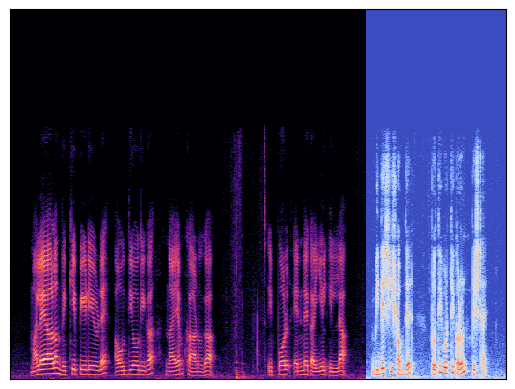

In [ ]:
for j in range(len(df3["Path"])):
  # print(df3["Path"][j])
  name=df3["Path"][j]
  res=name.split('(new)/')
  k=res[1]
  # print(k)
  if k.endswith('.wav'):
    folder=k[0:3]
    if folder=="kan":
        image_class_dir=spectro_direcvtory+"/Kannada"
    elif folder=="mal":
        image_class_dir=spectro_direcvtory+"/Malayalam"
    elif folder=="ben":
        image_class_dir=spectro_direcvtory+"/Bengali"
    elif folder=="mar":
        image_class_dir=spectro_direcvtory+"/Marathi"
    elif folder=="tel":
        image_class_dir=spectro_direcvtory+"/Telugu"
    elif folder=="tam":
        image_class_dir=spectro_direcvtory+"/Tamil"
    elif folder=="hin":
        image_class_dir=spectro_direcvtory+"/Hindi"

    # print(name)
    signal, sample_rate = librosa.load(name)
    freqs = np.fft.fftfreq(signal.size)

    fft = np.fft.fft(signal)
    spectrum = np.abs(fft)

    f = np.linspace(0, sample_rate, len(spectrum))

    hop_length_duration = float(hop_length)/sample_rate
    n_fft_duration = float(n_fft)/sample_rate
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

    spectrogram = np.abs(stft)

    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)

    image_path = os.path.join(image_class_dir, k.replace('.wav', '.png'))
    plt.savefig(image_path)

In [ ]:
print(name)

/content/drive/MyDrive/Datasets/Malayalam(new)/mal_0010.wav


In [ ]:

# for folder in os.listdir(wave_file_directory):
  # for file in os.listdir(wave_file_directory +"/"+folder):
  #   if file.endswith('.wav'):
  #       #image name
  #       if folder=="small_H_dataset":
  #         image_class_dir=spectro_direcvtory+"/healthy"
  #       else:
  #         image_class_dir=spectro_direcvtory+"/pathological"

  #       #converting wav to specs
  #       signal, sample_rate = librosa.load(wave_file_directory +"/"+folder+"/"+file)
  #       freqs = np.fft.fftfreq(signal.size)


  #       # FFT -> power spectrum
  #       # perform Fourier transform
  #       fft = np.fft.fft(signal)
  #       # calculate abs values on complex numbers to get magnitude
  #       spectrum = np.abs(fft)

  #       # create frequency variable
  #       f = np.linspace(0, sample_rate, len(spectrum))

  #       # calculate duration hop length and window in seconds
  #       hop_length_duration = float(hop_length)/sample_rate
  #       n_fft_duration = float(n_fft)/sample_rate

  #       # perform stft
  #       stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

  #       # calculate abs values on complex numbers to get magnitude
  #       spectrogram = np.abs(stft)

  #       # apply logarithm to cast amplitude to Decibels
  #       log_spectrogram = librosa.amplitude_to_db(spectrogram)
  #       librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)

  #       # librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')

  #       image_path = os.path.join(image_class_dir, file.replace('.wav', '.png'))
  #       plt.savefig(image_path)

  #       # print(image_path)
  #       # spec = np.load(image_path)

# ENTIRE DATASET

In [ ]:
import os
path="/content/drive/MyDrive/Datasets/IIIT Spoken Language Datasets"

os.listdir(path)

['Bengali(lang)',
 'Hindi(lang)',
 'Kannada(lang)',
 'Malayalam(lang)',
 'Marathi(lang)',
 'Tamil(lang)',
 'Telugu(lang)']

In [ ]:
list_path=['Bengali(lang)',
 'Hindi(lang)',
 'Kannada(lang)',
 'Malayalam(lang)',
 'Marathi(lang)',
 'Tamil(lang)',
 'Telugu(lang)']

full_wav_files=[]
final_list=[]
for j in list_path:
  path_name=path+"/"+j
  # print(path_name)
  for k in os.listdir(path_name):

    final_list.append(k[0:3])
    full_wav_files.append(path_name+"/"+k)


In [ ]:
import pandas as pd
dataf1=pd.DataFrame(final_list,columns=['Class'])
dataf2=pd.DataFrame(full_wav_files,columns=['Path'])

dataf3=pd.concat([dataf1,dataf2], axis=1)

In [ ]:
dataf3.to_csv("/content/drive/MyDrive/Entire_dataset.csv")

In [ ]:
spectro_directory="/content/drive/MyDrive/SPECTROGRAM_ENTIRE_DATASET"

In [ ]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
spect="/content/drive/MyDrive/SPECTROGRAM_ENTIRE_DATASET/Kannada"

In [ ]:
file2="ben_0001.wav"

In [ ]:
import time

In [ ]:
for i in tqdm(range(10)):
  for j in range(len(dataf3["Path"])):
    # print(df3["Path"][j])
    name=dataf3["Path"][j]
    res=name.split('(lang)/')
    k=res[1]
    # print(k)
    if k.endswith('.wav'):
      folder=k[0:3]

      if folder=="kan":
          image_class_dir=spectro_directory+"/Kannada"
      elif folder=="mal":
          image_class_dir=spectro_directory+"/Malayalam"
      # elif folder=="ben":
      #     image_class_dir=spectro_directory+"/Bengali"
      elif folder=="mar":
          image_class_dir=spectro_directory+"/Marathi"
      elif folder=="tel":
          image_class_dir=spectro_directory+"/Telugu"
      elif folder=="tam":
          image_class_dir=spectro_directory+"/Tamil"
      elif folder=="hin":
          image_class_dir=spectro_directory+"/Hindi"

      # print(name)
      signal, sample_rate = librosa.load(name)
      freqs = np.fft.fftfreq(signal.size)

      fft = np.fft.fft(signal)
      spectrum = np.abs(fft)

      f = np.linspace(0, sample_rate, len(spectrum))

      hop_length_duration = float(hop_length)/sample_rate
      n_fft_duration = float(n_fft)/sample_rate
      stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

      spectrogram = np.abs(stft)

      log_spectrogram = librosa.amplitude_to_db(spectrogram)
      librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)

      image_path = os.path.join(image_class_dir, k.replace('.wav', '.png'))
      plt.savefig(image_path)

      time.sleep(0.5)

        # print(image_path)
        # spec = np.load(image_path)


  0%|          | 0/10 [1:58:45<?, ?it/s]


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7a9d26ab1fc0> (for post_execute):


KeyboardInterrupt: ignored